In [2]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 700)

In [3]:
g_data = pd.read_pickle('./data_max_1year')
print(len(g_data))
display(g_data.head())

249


,TDS,PMI_days,log_PMI_days,age_at_death,sex_male,est_weight_lb,est_stature_in,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,fall,spring,summer,log_ADD_thres0,ADD_thres0,ADD_thres5,ADD_thres10,ADD_thres15,ADD_thres20,ADD_thres25,ADD_thres30,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std,temp_155_365_mean,temp_155_365_std,hum_155_365_mean,hum_155_365_std,BMI,BMI_status
0,9.0,15.0,2.772589,77.0,0,180.0,64.000000,3.0,3.0,3.0,0,0,0,4.315902,73.881146,65.115868,32.350972,0.000000,0.000000,0.000000,0.00000,9.315,0.888,71.621,12.679,-3.108,7.418,62.885,6.736,-0.699,6.638,74.493,16.490,4.205,5.889,78.049,14.677,16.426,6.113,76.979,10.014,18.181,7.197,67.221,13.361,30.9,obese
1,13.0,79.0,4.382027,38.0,1,516.0,73.000039,5.0,5.0,3.0,0,1,0,7.190920,1326.323441,1326.323441,1279.608857,983.358857,391.756402,0.000000,0.00000,19.485,0.935,57.198,2.203,18.725,0.697,76.769,8.882,17.617,4.230,64.476,8.287,16.590,4.368,58.561,15.086,7.484,7.232,69.266,15.024,19.483,6.770,74.838,10.009,68.1,obese
2,15.0,164.0,5.105945,38.0,1,516.0,73.000039,6.0,6.0,3.0,0,0,1,8.175567,3552.068684,3552.068684,3505.354100,3209.104100,2617.501645,1785.331086,30.05625,27.174,1.174,71.959,6.483,28.471,0.317,63.152,0.949,26.955,1.031,72.737,6.045,26.864,1.680,67.719,7.432,18.606,5.250,63.088,13.413,12.155,8.104,73.635,12.741,68.1,obese
3,13.0,50.0,3.931826,73.0,1,235.0,73.000039,5.0,4.0,4.0,0,0,0,5.764677,317.835928,268.610789,126.581344,30.420863,0.000000,0.000000,0.00000,3.511,1.705,89.241,11.812,2.666,2.899,57.956,9.740,10.313,2.750,84.482,10.465,5.370,3.923,79.734,12.914,18.516,7.254,81.323,8.885,16.984,8.703,73.738,13.603,31.0,obese
4,6.0,11.0,2.484907,90.0,0,170.0,69.000037,2.0,2.0,2.0,0,0,0,4.258335,69.692188,54.013368,39.090451,15.414583,0.000000,0.000000,0.00000,3.825,1.623,80.427,17.534,3.942,4.081,64.240,4.184,6.799,5.078,79.896,12.073,10.311,4.085,80.913,11.039,24.042,2.560,80.822,7.902,12.899,9.807,73.032,14.609,25.1,overweight


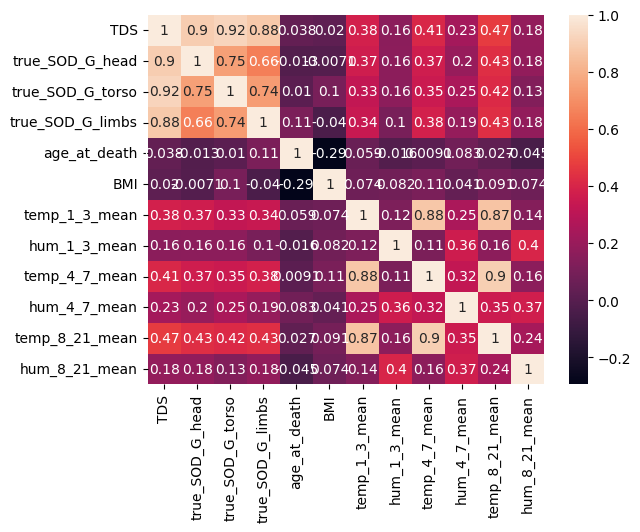

In [4]:
corr_matrix = g_data[['TDS', 'true_SOD_G_head', 'true_SOD_G_torso', 'true_SOD_G_limbs','age_at_death', 'BMI', 
                      'temp_1_3_mean', 'hum_1_3_mean', 'temp_4_7_mean',
           'hum_4_7_mean', 'temp_8_21_mean', 'hum_8_21_mean']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [5]:
g_data['temp_1_21_mean'] = (g_data['temp_1_3_mean'] + g_data['temp_4_7_mean'] + g_data['temp_8_21_mean'])/3.0
g_data['hum_1_21_mean'] = (g_data['hum_1_3_mean'] + g_data['hum_4_7_mean'] + g_data['hum_8_21_mean'])/3.0
g_data.describe()

,TDS,PMI_days,log_PMI_days,age_at_death,sex_male,est_weight_lb,est_stature_in,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,fall,spring,summer,log_ADD_thres0,ADD_thres0,ADD_thres5,ADD_thres10,ADD_thres15,ADD_thres20,ADD_thres25,ADD_thres30,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std,temp_155_365_mean,temp_155_365_std,hum_155_365_mean,hum_155_365_std,BMI,temp_1_21_mean,hum_1_21_mean
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,10.835341,81.032129,3.796573,63.811245,0.489960,189.554217,66.991998,3.811245,3.518072,3.506024,0.224900,0.325301,0.273092,6.328518,1182.565102,1153.921953,1067.769242,893.091287,652.652290,272.824201,3.185152,16.510225,1.973000,68.423442,7.579651,16.247811,2.302859,68.840221,8.544285,15.888000,3.352755,69.310566,11.214076,15.166221,3.973386,70.082908,11.865406,13.909044,5.384145,69.802233,12.651008,16.150410,7.198438,71.151297,12.246574,29.460241,16.215345,68.858076
std,2.866836,87.690892,1.191370,16.097501,0.500906,69.672709,3.913513,1.118266,1.051437,1.016479,0.418357,0.469431,0.446445,1.312086,1468.944379,1451.636283,1395.699539,1249.136530,1028.647638,582.192175,13.546427,8.011245,1.415787,11.101837,5.298932,8.015351,1.655549,9.858375,5.348772,7.897611,1.635434,7.765087,4.132659,7.952929,1.620926,6.007957,3.342319,7.023522,1.542990,4.789429,2.477489,4.119763,1.503085,3.548865,1.564935,9.700968,7.654071,7.340677
min,4.000000,2.000000,1.098612,26.000000,0.000000,93.000000,59.000032,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.059717,20.321528,16.846458,0.000000,0.000000,0.000000,0.000000,0.000000,-7.121000,0.124000,38.323000,0.297000,-5.316000,0.208000,46.812000,0.593000,-1.662000,0.898000,49.971000,2.979000,0.534000,1.167000,56.909000,5.716000,3.417000,1.657000,60.149000,7.029000,8.330000,4.080000,63.527000,9.650000,15.300000,-3.048667,48.672667
25%,9.000000,16.000000,2.833213,54.000000,0.000000,136.000000,64.000035,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,5.505174,244.961131,228.585372,177.622500,87.119816,0.000000,0.000000,0.000000,10.867000,0.888000,61.719000,3.377000,10.064000,1.009000,61.622000,4.299000,8.764000,1.924000,62.539000,7.872000,7.738000,2.617000,65.656000,9.054000,7.586000,4.479000,66.451000,10.849000,12.403000,5.943000,68.876000,10.974000,22.500000,9.081333,63.525000
50%,11.000000,49.000000,3.912023,63.000000,0.000000,180.000000,67.000036,4.000000,3.000000,3.000000,0.000000,0.000000,0.000000,6.380610,589.287550,579.033137,470.084851,336.388383,163.529435,0.000000,0.000000,18.032000,1.623000,68.840000,6.553000,17.994000,1.858000,69.539000,7.379000,16.118000,3.120000,69.979000,10.834000,15.535000,4.054000,70.761000,11.658000,13.535000,5.703000,69.983000,12.911000,16.717000,7.337000,71.414000,12.196000,27.400000,17.081333,69.452333
75%,12.000000,111.000000,4.718499,75.000000,1.000000,234.000000,70.000000,5.000000,4.000000,4.000000,0.000000,1.000000,1.000000,7.141903,1262.831388,1251.158819,1206.436840,1034.212103,868.199861,238.618681,0.000000,23.367000,2.744000,77.180000,10.496000,23.233000,3.014000,76.658000,12.313000,23.160000,4.483000,75.980000,14.520000,23.178000,5.057000,74.323000,14.759000,20.831000,6.527000,72.544000,14.774000,19.997000,8.488000,74.128000,13.420000,35.400000,23.426667,74.569000
max,18.000000,353.000000,5.869297,96.

In [6]:
# create y dataframes
y_pmi = g_data['log_PMI_days'].copy()
display(y_pmi.head(2))
print(y_pmi.shape)

y_add = g_data['log_ADD_thres0'].copy()
display(y_add.head(2))
print(y_add.shape)

0    2.772589
1    4.382027
Name: log_PMI_days, dtype: float64

(249,)


0    4.315902
1    7.190920
Name: log_ADD_thres0, dtype: float64

(249,)


In [7]:
def standardize_X(X, col_names_ls):
    # standardize numeric features
    X_stand = X.copy()

    # apply standardization
    for i in col_names_ls:
    
        # fit on training data column
        scale = StandardScaler().fit(X_stand[[i]])
    
        # transform the training data column
        X_stand[i] = scale.transform(X_stand[[i]])
        
    return X_stand

In [16]:
def fit_model(X, y, file_path):
    X = sm.add_constant(X) 
    est = sm.OLS(y, X).fit() 
    print(est.summary())
    
    y_pred = est.predict(X)
    #print(y_pred[:2])
    rmse = mean_squared_error(y, y_pred, squared = False)
    print('RMSE:', rmse)
    
    y_pred_unlogged = np.exp(y_pred) - 1
    y_unlogged = np.exp(y) - 1
    #print(y_pred_unlogged[:2], y_unlogged[:2])
    rmse_unlogged = mean_squared_error(y_unlogged, y_pred_unlogged, squared = False)
    print('RMSE (unlogged):', rmse_unlogged)
    
    pi = 2*rmse
    print('PI: +/-', pi)
    print('PI (unlogged): +/-',  np.exp(pi))
    
    fig = plt.figure(figsize=(5, 5)) 
    residuals = y - y_pred
    plt.hist(residuals)
    #fig = sm.graphics.plot_regress_exog(est, 'TDS', fig=fig) 
    plt.show()
    
    fig = plt.figure(figsize=(5, 5)) 
    plt.scatter(y_pred, residuals)
    plt.title('Fitted vs. Resisual Plot')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()
    
    fig = plt.figure(figsize=(5, 5)) 
    plt.scatter(y, y_pred)
    #plt.title('Actual vs. Predicted')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.axline((2, 2), slope=1, color='r', linestyle='--')
    #plt.xlim(1, 8)
    #plt.ylim(1, 8)
    #plt.axis('equal')
    #fig = sm.graphics.plot_regress_exog(est, 'TDS', fig=fig) 
    plt.savefig(file_path)
    plt.show()

## TDS

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     89.01
Date:                Sun, 12 May 2024   Prob (F-statistic):           3.03e-18
Time:                        14:35:01   Log-Likelihood:                -358.10
No. Observations:                 249   AIC:                             720.2
Df Residuals:                     247   BIC:                             727.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4790      0.254      5.821      0.0

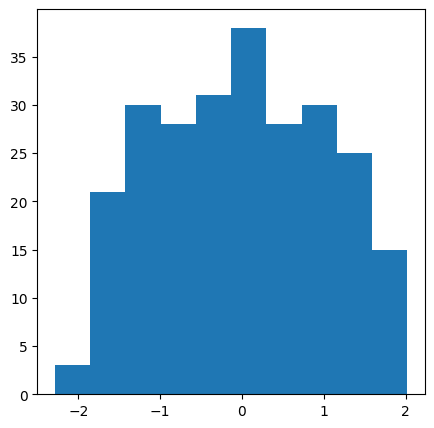

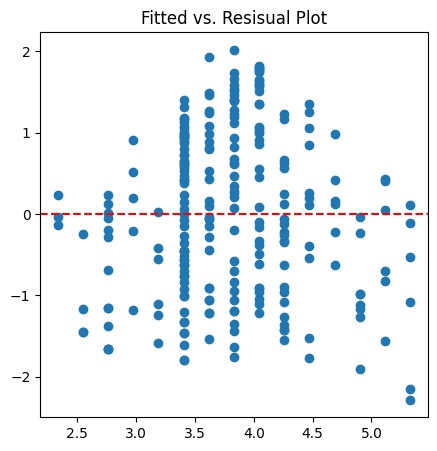

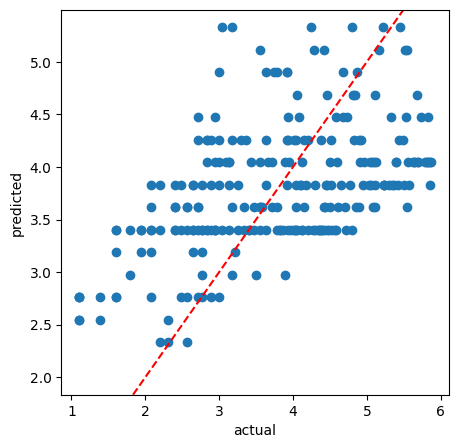

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     175.2
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.40e-30
Time:                        14:35:01   Log-Likelihood:                -353.72
No. Observations:                 249   AIC:                             711.4
Df Residuals:                     247   BIC:                             718.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

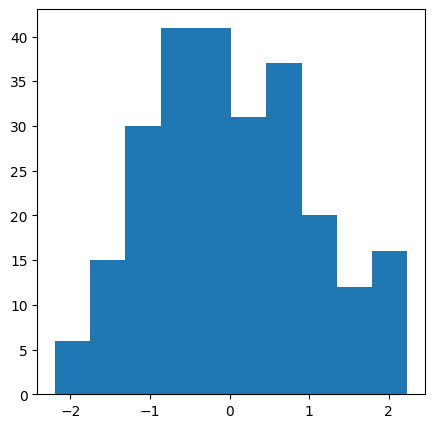

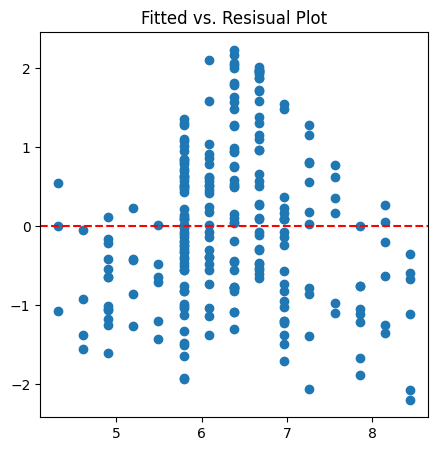

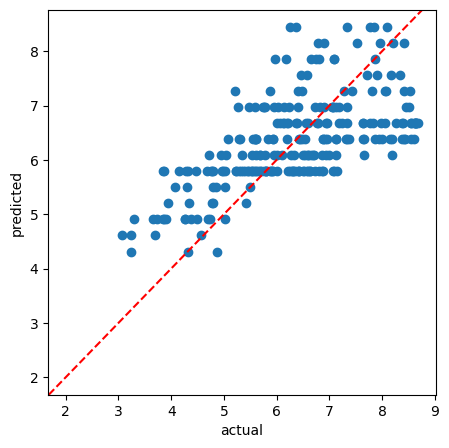

In [18]:
X1 = g_data[['TDS']]

pmi1 = fit_model(X1, y_pmi, 'figures/pred_actual_PMI.png')
print('############################################################################################')
add1 = fit_model(X1, y_add, 'figures/pred_actual_ADD.png')

## Weighted SODs

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     32.76
Date:                Tue, 07 May 2024   Prob (F-statistic):           7.70e-18
Time:                        13:47:11   Log-Likelihood:                -354.42
No. Observations:                 249   AIC:                             716.8
Df Residuals:                     245   BIC:                             730.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5169      0.252  

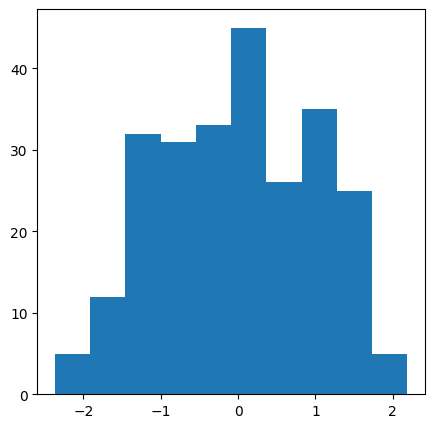

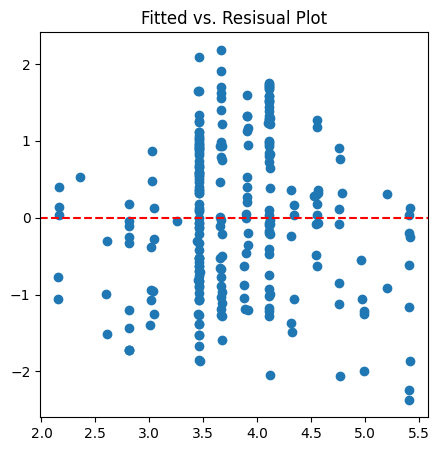

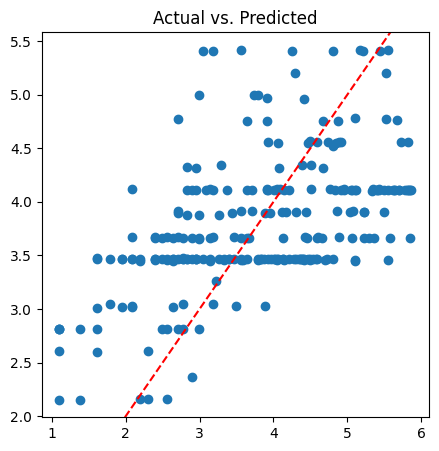

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     59.73
Date:                Tue, 07 May 2024   Prob (F-statistic):           5.15e-29
Time:                        13:47:11   Log-Likelihood:                -352.11
No. Observations:                 249   AIC:                             712.2
Df Residuals:                     245   BIC:                             726.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

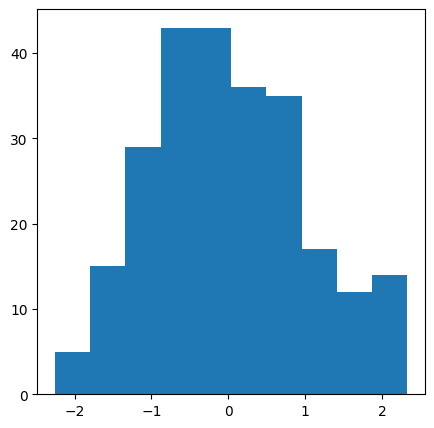

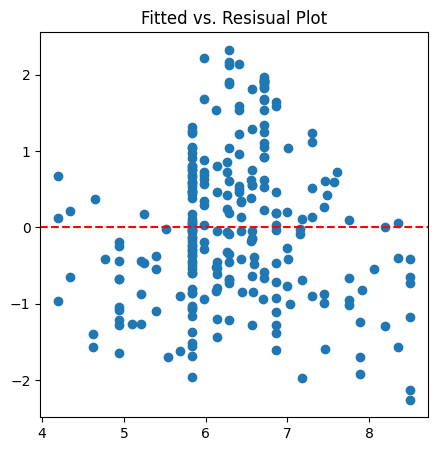

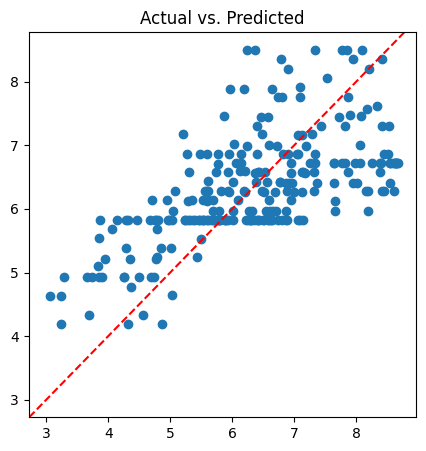

In [26]:
X2 = g_data[['true_SOD_G_head', 'true_SOD_G_torso', 'true_SOD_G_limbs']]

pmi2 = fit_model(X2, y_pmi)
print('############################################################################################')
add2 = fit_model(X2, y_add)

## TDS + demographics (BMI, age, sex)

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     23.55
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.77e-16
Time:                        14:42:30   Log-Likelihood:                -355.77
No. Observations:                 249   AIC:                             721.5
Df Residuals:                     244   BIC:                             739.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.9066      0.091     42.852   

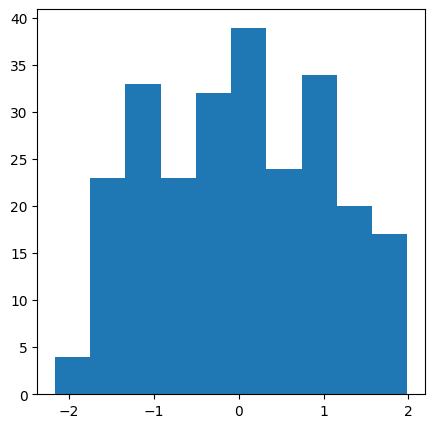

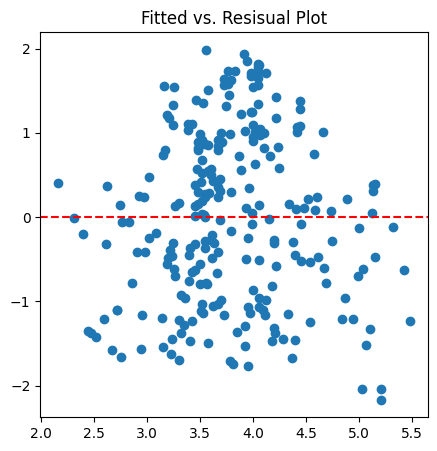

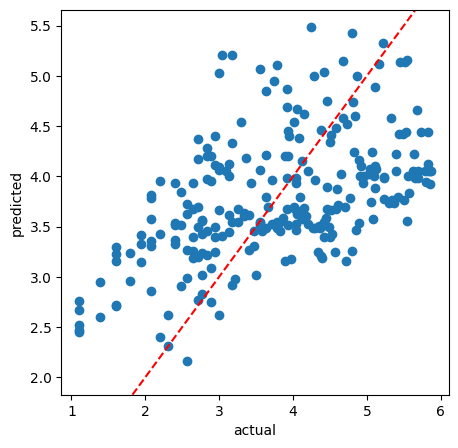

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     45.27
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.05e-28
Time:                        14:42:31   Log-Likelihood:                -351.34
No. Observations:                 249   AIC:                             712.7
Df Residuals:                     244   BIC:                             730.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

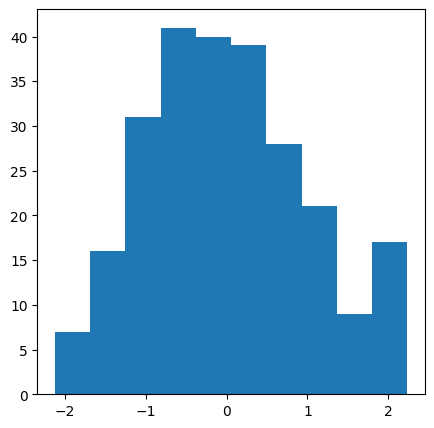

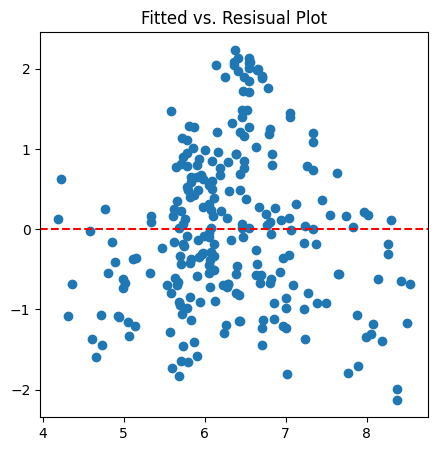

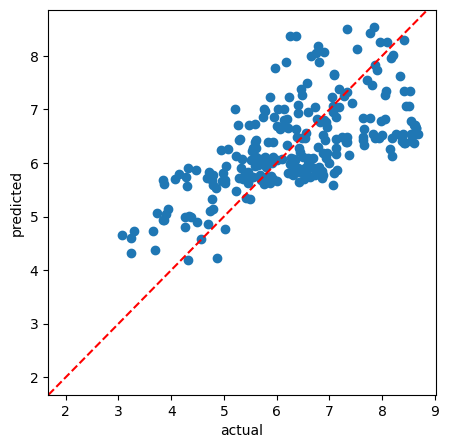

In [19]:
X3 = g_data[['TDS', 'BMI', 'age_at_death', 'sex_male']]
X3_stand = standardize_X(X3, ['TDS', 'BMI', 'age_at_death'])
#display(X3_stand.describe())

pmi3 = fit_model(X3_stand, y_pmi, 'figures/pred_actual_PMI.png')
print('############################################################################################')
add3 = fit_model(X3_stand, y_add, 'figures/pred_actual_ADD.png')

## TDS + demographics (BMI, age, sex) + season of discovery

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     17.03
Date:                Sun, 12 May 2024   Prob (F-statistic):           3.05e-18
Time:                        14:44:17   Log-Likelihood:                -346.39
No. Observations:                 249   AIC:                             708.8
Df Residuals:                     241   BIC:                             736.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1229      0.167     24.755   

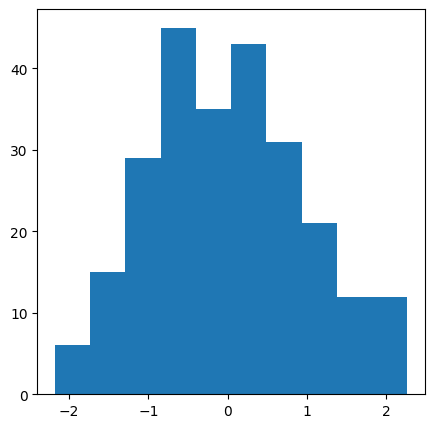

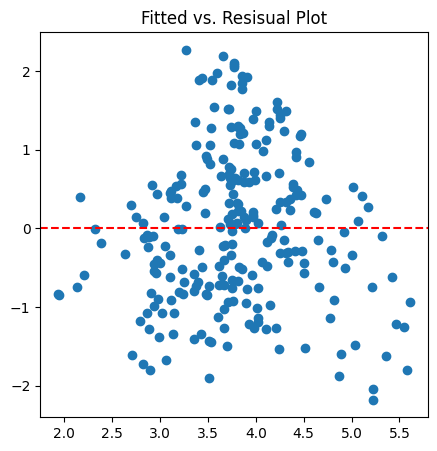

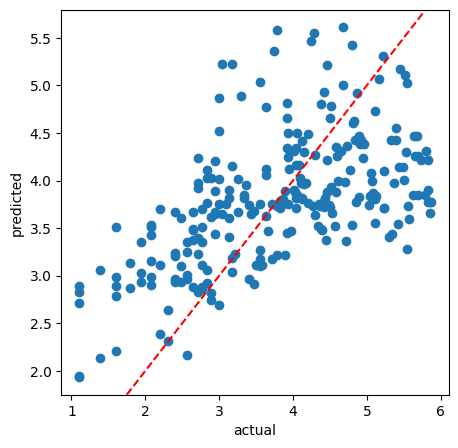

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     27.10
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.72e-27
Time:                        14:44:17   Log-Likelihood:                -348.16
No. Observations:                 249   AIC:                             712.3
Df Residuals:                     241   BIC:                             740.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

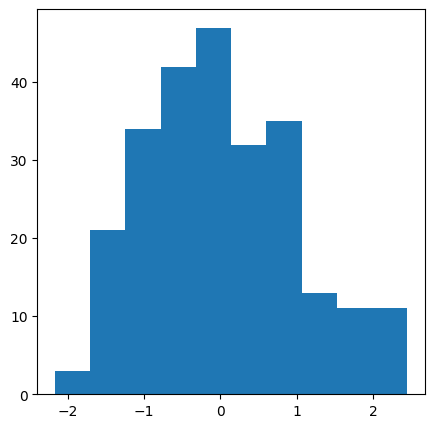

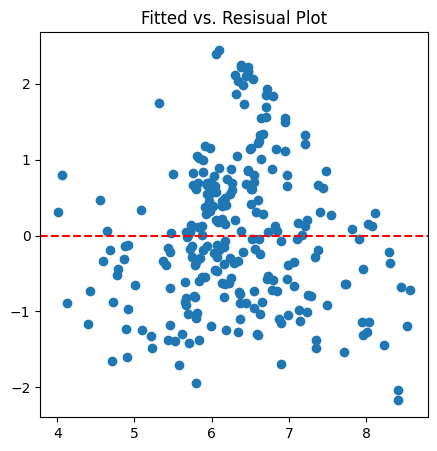

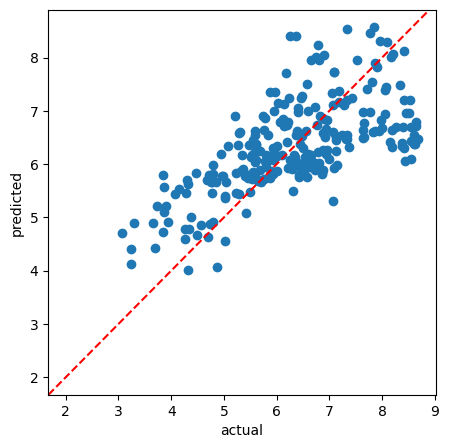

In [21]:
X4 = g_data[['TDS', 'BMI', 'age_at_death', 'sex_male',
            'fall', 'spring', 'summer']]
X4_stand = standardize_X(X4, ['TDS', 'BMI', 'age_at_death'])
#display(X4_stand.describe())

pmi4 = fit_model(X4_stand, y_pmi, 'figures/pred_actual_PMI.png')
print('############################################################################################')
add4 = fit_model(X4_stand, y_add, 'figures/pred_actual_ADD.png')

## TDS + demographics (BMI, age, sex) + season of discovery + weather related

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     15.40
Date:                Sun, 12 May 2024   Prob (F-statistic):           9.97e-20
Time:                        14:44:27   Log-Likelihood:                -339.48
No. Observations:                 249   AIC:                             699.0
Df Residuals:                     239   BIC:                             734.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.6215      0.225     20.

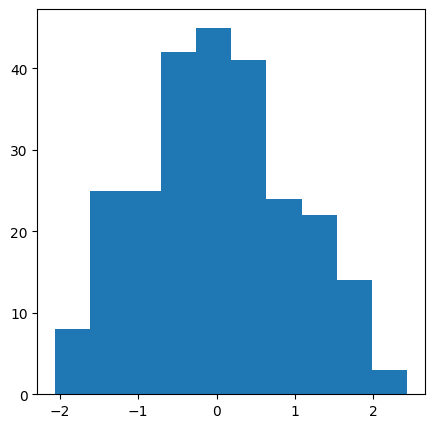

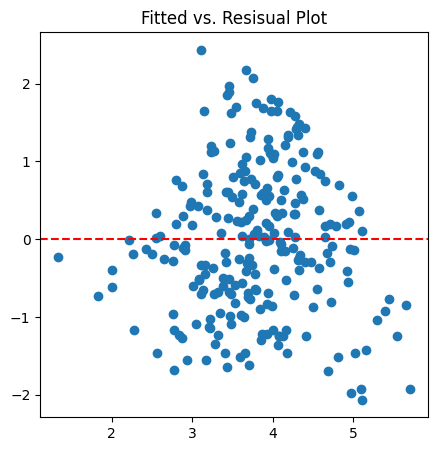

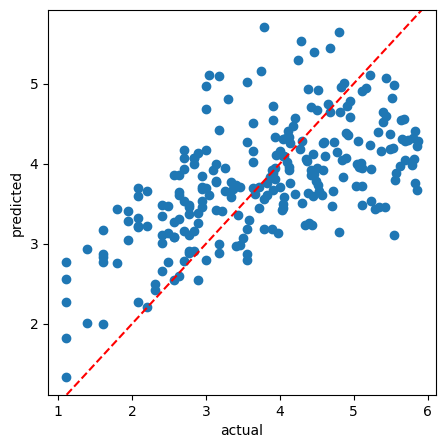

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     31.12
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.14e-35
Time:                        14:44:28   Log-Likelihood:                -323.89
No. Observations:                 249   AIC:                             667.8
Df Residuals:                     239   BIC:                             703.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

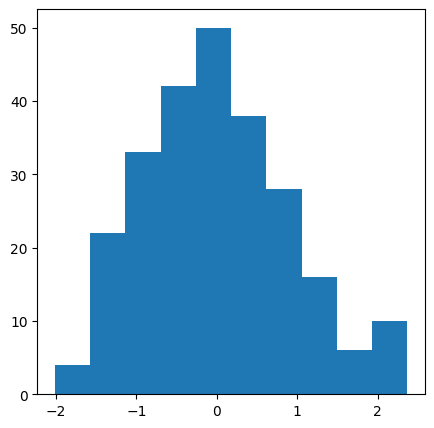

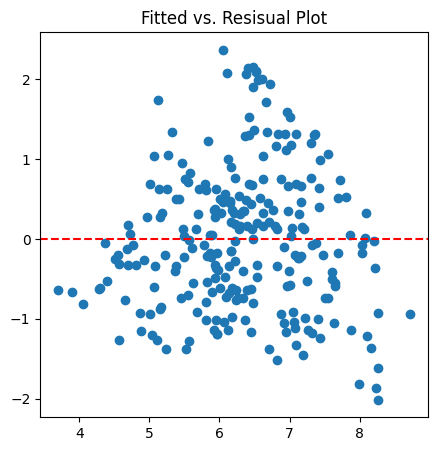

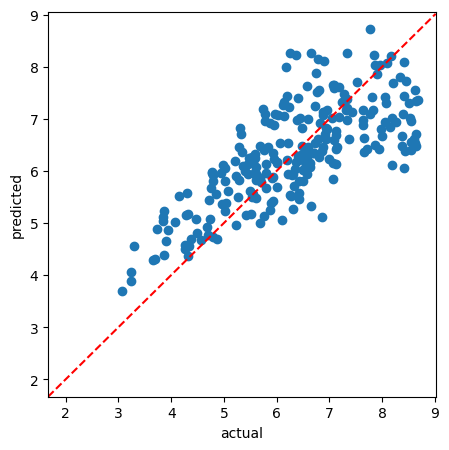

In [22]:
X5 = g_data[['TDS', 'BMI', 'age_at_death', 'sex_male',
            'fall', 'spring', 'summer','temp_1_21_mean', 'hum_1_21_mean']]
X5_stand = standardize_X(X5, ['TDS', 'BMI', 'age_at_death','temp_1_21_mean', 'hum_1_21_mean'])
#display(X4_stand.describe())

pmi5 = fit_model(X5_stand, y_pmi, 'figures/pred_actual_PMI.png')
print('############################################################################################')
add5 = fit_model(X5_stand, y_add, 'figures/pred_actual_ADD.png')